# Business Case: Based on given features we need to find whether an employee will leave the company or not.

In [1]:
%pip install ydata-profiling


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle
from sklearn.pipeline import Pipeline
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("HR.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Domain Analysis

Age – Indicates the employee’s age; may correlate with experience and turnover rate.

Attrition – Target variable showing whether the employee left the company (Yes/No).

BusinessTravel – Frequency of work-related travel; high travel may increase attrition.

DailyRate – Daily wage rate; may reflect pay satisfaction.

Department – Functional area (e.g., Sales, R&D); helps analyze attrition by department.

DistanceFromHome – Distance from home to workplace; long commutes can affect retention.

Education – Education level (1 to 5); may affect job fit and growth expectations.

EducationField – Field of study; helps evaluate job-role relevance.

EmployeeCount – Always 1 (constant); often dropped as it holds no variability.

EmployeeNumber – Unique ID; used for identification, not analysis.

EnvironmentSatisfaction – Satisfaction with work environment (1–4); impacts retention.

Gender – Male or Female; used for diversity and bias analysis.

HourlyRate – Wage per hour; financial factor that may influence satisfaction.

JobInvolvement – Level of job engagement (1–4); low involvement may lead to attrition.

JobLevel – Position level in hierarchy; correlates with salary, responsibilities.

JobRole – Job title/role; useful to spot attrition trends by role.

JobSatisfaction – Satisfaction with job (1–4); highly predictive of attrition.

MaritalStatus – Marital status (Single/Married/Divorced); may influence stability.

MonthlyIncome – Monthly salary; critical for understanding pay satisfaction.

MonthlyRate – Monthly wage rate; less useful if redundant with MonthlyIncome.

NumCompaniesWorked – Total companies worked for; indicates job-hopping tendency.

Over18 – Always "Y"; redundant for analysis.

OverTime – Whether employee works overtime; overtime stress may raise attrition.

PercentSalaryHike – Last salary hike percentage; reflects reward and motivation.

PerformanceRating – Performance score (1–4); high performers may expect growth.

RelationshipSatisfaction – Satisfaction with coworkers/managers (1–4); influences engagement.

StandardHours – Constant (usually 80); not useful due to lack of variation.

StockOptionLevel – Employee stock option benefit (0–3); can affect retention.

TotalWorkingYears – Total years of experience; gives seniority insights.

TrainingTimesLastYear – Number of trainings; reflects learning opportunities.

WorkLifeBalance – Perceived balance (1–4); poor balance increases attrition risk.

YearsAtCompany – Tenure at company; shorter tenures often show higher attrition.

YearsInCurrentRole – Time in current job role; stagnation may impact satisfaction.

YearsSinceLastPromotion – Time since last promotion; delays may demotivate.

YearsWithCurrManager – Time with current manager; long relationships may increase retention.

In [6]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns      # It selects all numerical columns

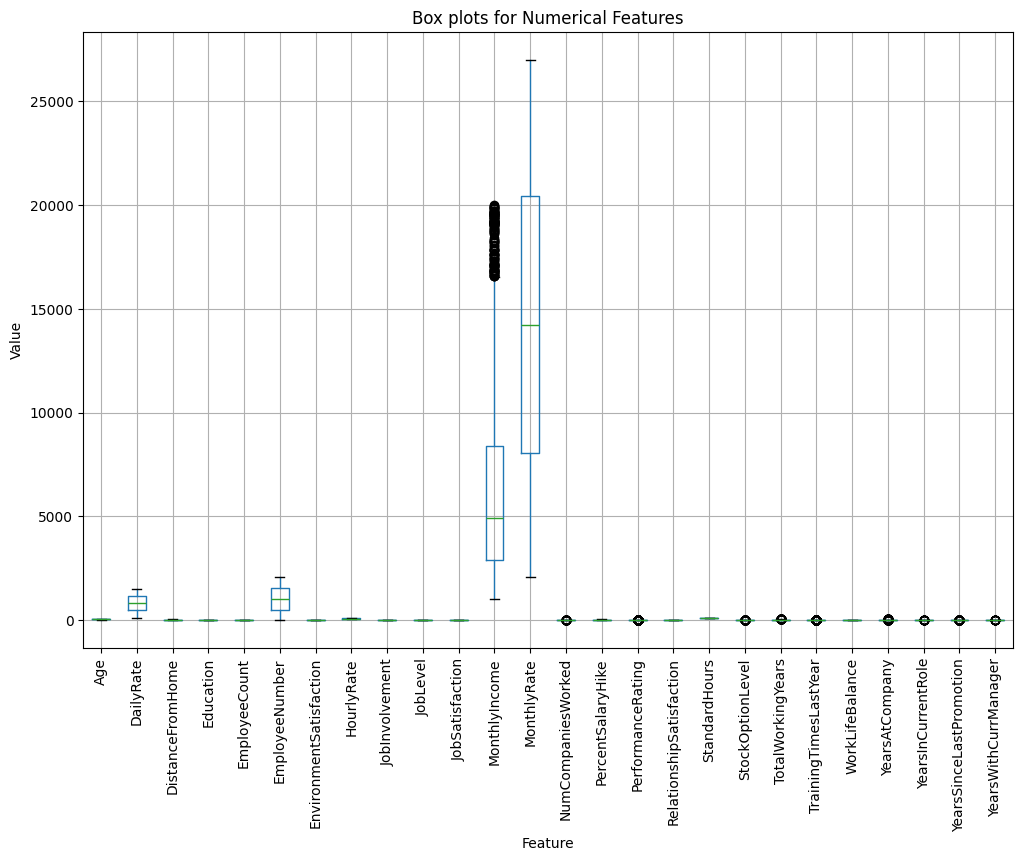

In [7]:
# Create box plots for all numerical features 
plt.figure(figsize=(12, 8))
df[numerical_cols].boxplot()
plt.xticks(rotation=90)
plt.title('Box plots for Numerical Features')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()

Insights

Drop EmployeeCount, StandardHours, Over18, and EmployeeNumber – they have no value for prediction.

MonthlyIncome, MonthlyRate have high values and outliers – apply scaling or log transformation.

NumCompaniesWorked, TotalWorkingYears, YearsAtCompany show outliers – consider treating them.

Age, DistanceFromHome, DailyRate are well-distributed – no action needed.

JobSatisfaction, WorkLifeBalance, RelationshipSatisfaction show low variation – may not help much in prediction.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Insights

There are no null values in the dataset

Attrition is the target column